#  Project : Text Classification 

### Note : Run all the cells and some cells will take time to execute. Please be patience & wait till the end. 

In [1]:
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

## This list contains all Stop Words. I have get this list from Internet.

In [2]:
stop_word=['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hasnt', 'have', 'having', 'he', "he'd", "he'll", "he's", 'hence', 'her', 'here', "here's", 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'however', 'hundred', 'i', "i'd", "i'll", "i'm", "i've", 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', "it's", 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less', "let's", 'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'she', "she'd", "she'll", "she's", 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 't', 'take', 'ten', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', "there's", 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', "they'd", "they'll", "they're", "they've", 'thickv', 'thin', 'third', 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we', "we'd", "we'll", "we're", "we've", 'well', 'were', 'what', "what's", 'whatever', 'when', "when's", 'whence', 'whenever', 'where', "where's", 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', "who's", 'whoever', 'whole', 'whom', 'whose', 'why', "why's", 'will', 'with', 'within', 'without', 'would', 'yet', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']
len(stop_word)

361

In [3]:
X = [] # an element of X is represented as (filename,text)
Y = [] # an element of Y represents the newsgroup category of the corresponding X element

for category in os.listdir('20_newsgroups'):
    if(category != '.DS_Store'):# I am using '.DS_Store' because i getting an error in my Macbook. 
        #there is some hidden files. i tried a lot to solve this problem. but could not be able to find the solution.
        #print(category)
        for document in os.listdir('20_newsgroups/'+category):
            with open('20_newsgroups/'+category+'/'+document, encoding="ISO-8859-1") as f:
                X.append((document,f.read()))
                Y.append(category)

In [4]:
print(len(Y))


19997


## DataType of X and Y in detail


In [5]:
print(type(X))
print(len(X[0]))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))

print()
print()

print(type(Y))
print(len(Y[0]))
print(type(Y[0]))
print(type(Y[0][0]))
print(type(Y[0][1]))

<class 'list'>
2
<class 'tuple'>
<class 'str'>
<class 'str'>


<class 'list'>
21
<class 'str'>
<class 'str'>
<class 'str'>


### We can see it is a tuple with first element as name of document and second text of document.

In [6]:
print(X[0][1])

Newsgroups: talk.politics.mideast
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!cs.utexas.edu!uunet!brunix!doorknob!hm
From: hm@cs.brown.edu (Harry Mamaysky)
Subject: Heil Hernlem 
In-Reply-To: hernlem@chess.ncsu.edu's message of Wed, 14 Apr 1993 12:58:13 GMT
Message-ID: <HM.93Apr15112701@yoda.cs.brown.edu>
Sender: news@cs.brown.edu
Organization: Dept. of Computer Science, Brown University
References: <1993Apr14.125813.21737@ncsu.edu>
Date: Thu, 15 Apr 1993 16:27:01 GMT
Lines: 24

In article <1993Apr14.125813.21737@ncsu.edu> hernlem@chess.ncsu.edu (Brad Hernlem) writes:

   Lebanese resistance forces detonated a bomb under an Israeli occupation
   patrol in Lebanese territory two days ago. Three soldiers were killed and
   two wounded. In "retaliation", Israeli and Israeli-backed forces wounded
   8 civilians by bombarding several Lebanese villages. Ironically, the Israeli
   government justifie

### splitting the data in training and testing

In [7]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

### split has done in nearly 3:1 ratio

In [8]:
print(len(x_train))
print(len(x_test))
print()
print(len(y_train))
print(len(y_test))

14997
5000

14997
5000


### Demonstrating re.split

### Making Dictionary of words with their corresponding frequency

In [10]:
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1

            
dic

{'path': 15277,
 'cantaloupe': 19563,
 'srv': 24293,
 'cmu': 39237,
 'edu': 123223,
 'das': 4567,
 'news': 25713,
 'harvard': 5250,
 'ogicse': 631,
 'uwm': 1418,
 'utexas': 3190,
 'utnut': 390,
 'torn': 479,
 'pulp': 32,
 'laurentian': 279,
 'maynard': 232,
 'ramsey': 228,
 'roger': 393,
 'newsgroups': 15317,
 'rec': 4746,
 'sport': 1779,
 'hockey': 1430,
 'subject': 16126,
 'europeans': 104,
 'nhl': 365,
 'message': 16445,
 'date': 15574,
 'apr': 15400,
 'gmt': 13365,
 'article': 10044,
 'references': 9714,
 'rauser': 66,
 'sfu': 289,
 'organization': 14856,
 'dept': 877,
 'computer': 2764,
 'science': 1929,
 'university': 7528,
 'sudbury': 31,
 'lines': 15666,
 'fraser': 96,
 'richard': 565,
 'racist': 82,
 'writes': 11056,
 'kinds': 178,
 'unacceptably': 4,
 'drivel': 30,
 'deleted': 549,
 'man': 1585,
 'absolutely': 320,
 'say': 3934,
 'dishonourable': 1,
 'little': 1850,
 'caustically': 1,
 'necessary': 544,
 'xref': 4577,
 'talk': 9411,
 'politics': 6012,
 'misc': 8991,
 'alt': 5

### Sorting the dictionary on basis of frequency of words in descending order

In [11]:
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 123223),
 ('cmu', 39237),
 ('com', 37446),
 ('news', 25713),
 ('srv', 24293),
 ('cantaloupe', 19563),
 ('net', 19155),
 ('message', 16445),
 ('subject', 16126),
 ('lines', 15666),
 ('date', 15574),
 ('apr', 15400),
 ('newsgroups', 15317),
 ('path', 15277),
 ('organization', 14856),
 ('state', 14125),
 ('gmt', 13365),
 ('ohio', 11922),
 ('writes', 11056),
 ('article', 10044),
 ('comp', 9847),
 ('references', 9714),
 ('talk', 9411),
 ('misc', 8991),
 ('sender', 8307),
 ('ans', 8300),
 ('howland', 8245),
 ('reston', 8222),
 ('people', 7840),
 ('like', 7760),
 ('university', 7528),
 ('posting', 7353),
 ('nntp', 7045),
 ('mps', 6896),
 ('know', 6868),
 ('host', 6699),
 ('sci', 6571),
 ('think', 6233),
 ('zaphod', 6207),
 ('usenet', 6195),
 ('politics', 6012),
 ('alt', 5859),
 ('windows', 5710),
 ('rutgers', 5288),
 ('time', 5259),
 ('harvard', 5250),
 ('eng', 5174),
 ('use', 5167),
 ('near', 5149),
 ('new', 5004),
 ('rec', 4746),
 ('good', 4690),
 ('crabapple', 4677),
 ('soc', 4654

### Plotting graph on no. of words vs frequency 
### On basis of graph we can decide the number of features we want to take

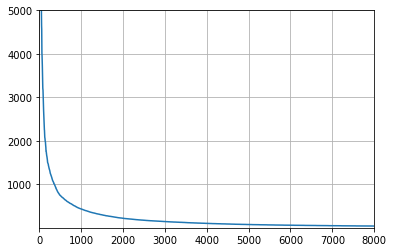

In [35]:
import matplotlib.pyplot as plt

features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])

plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   


### We decided to take top 3000 words with max freuqency as our feature
### Here feature list is answer1



In [13]:
answer1=[features[i][0] for i in range(3000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'organization',
 'state',
 'gmt',
 'ohio',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'sender',
 'ans',
 'howland',
 'reston',
 'people',
 'like',
 'university',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'think',
 'zaphod',
 'usenet',
 'politics',
 'alt',
 'windows',
 'rutgers',
 'time',
 'harvard',
 'eng',
 'use',
 'near',
 'new',
 'rec',
 'good',
 'crabapple',
 'soc',
 'sei',
 'noc',
 'xref',
 'das',
 'cis',
 'europa',
 'gtefsd',
 'ece',
 'world',
 'uunet',
 'religion',
 'make',
 'way',
 'say',
 'org',
 'god',
 'gov',
 'christian',
 'right',
 'rochester',
 'distribution',
 'club',
 'space',
 'mail',
 'want',
 'gatech',
 'magnesium',
 'reply',
 'culture',
 'ibm',
 'sun',
 'andrew',
 'utexas',
 'used',
 'said',
 'udel',
 'sys',
 'need',
 'uiuc',
 'really',
 'nasa',
 'work',
 'max',
 'sura',
 'problem',
 'compute

### Making x_train dataset
### No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)

In [14]:
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

### Making x_test dataset
### No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)

In [15]:
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

## Printing x_train and x_test dataset 

In [16]:
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[ 4  1  0 ...  0  0  0]
 [ 9  2  0 ...  0  0  0]
 [ 7  4  0 ...  0  0  0]
 ...
 [ 5  3  4 ...  0  0  0]
 [11  1  0 ...  0  0  0]
 [17  3  0 ...  0  0  0]]
--------------------------
[[ 8  3  5 ...  0  0  0]
 [ 3  1  8 ...  0  0  0]
 [12  1  1 ...  0  0  0]
 ...
 [11  1  1 ...  0  0  0]
 [ 7  3  6 ...  0  0  0]
 [ 3  3 12 ...  0  0  0]]


## Task 1:  Perform Test Classification using Multinomial Naive Bayes(already implemented in sklearn)

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Demonstrating confusion-matrix and classification report

In [28]:
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)

print("Score on training data:",clf.score(x_train_dataset,y_train))

inbuilt_sklearn_result=clf.score(x_test_dataset,y_test)

print("Score on testing data:",inbuilt_sklearn_result)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on training data: 0.9071147562845903
Score on testing data: 0.866
[[223   0   0   0   0   0   1   1   0   0   0   0   1   1   0   0   0   2
    0  32]
 [  0 192  12   9  11  11   8   2   1   0   0   0   4   0   3   0   0   0
    0   0]
 [  0   2 213  14   4  11   5   0   0   0   0   0   0   1   0   0   0   0
    0   0]
 [  0   4   4 214  22   2   5   0   0   0   0   1   0   0   0   0   0   0
    0   0]
 [  0   2   1  25 215   0   0   0   1   0   0   0   5   0   1   0   0   0
    0   0]
 [  0  16  24   9   3 211   3   0   2   0   0   1   4   0   2   0   0   0
    0   0]
 [  0   1   0   5   2   0 228   3   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   7 216   4   1   1   0   4   0   0   0   0   0
    1   0]
 [  0   0   0   0   1   0   4   7 251   0   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   5   3   2 239   6   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   3   3 245   0   1   1   0   0   0   0
    

## Task 2 : Implement Naive Bayes on your own from scratch for text classification.
## Self Implementation of Naive Baye's 

In [19]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
    return count


In [20]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
    

In [21]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [22]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [23]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [24]:

#This cell will take time to execute

dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)


In [25]:
dictionary

{'total_doc': 14997,
 'talk.politics.misc': {'edu': 7067,
  'cmu': 2346,
  'com': 2833,
  'news': 1387,
  'srv': 1581,
  'cantaloupe': 1330,
  'net': 854,
  'message': 825,
  'subject': 800,
  'lines': 781,
  'date': 770,
  'apr': 855,
  'newsgroups': 760,
  'path': 756,
  'organization': 761,
  'state': 1046,
  'gmt': 647,
  'ohio': 734,
  'writes': 977,
  'article': 897,
  'comp': 4,
  'references': 661,
  'talk': 2065,
  'misc': 2059,
  'sender': 377,
  'ans': 393,
  'howland': 385,
  'reston': 385,
  'people': 1135,
  'like': 514,
  'university': 351,
  'posting': 377,
  'nntp': 362,
  'mps': 371,
  'know': 564,
  'host': 339,
  'sci': 102,
  'think': 742,
  'zaphod': 324,
  'usenet': 370,
  'politics': 2251,
  'alt': 1231,
  'windows': 9,
  'rutgers': 188,
  'time': 373,
  'harvard': 253,
  'eng': 317,
  'use': 203,
  'near': 232,
  'new': 455,
  'rec': 0,
  'good': 279,
  'crabapple': 249,
  'soc': 426,
  'sei': 240,
  'noc': 199,
  'xref': 582,
  'das': 208,
  'cis': 210,
  'eur

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [29]:
self_implemented_algo_result = score(y_test,y_pred)
print("Score on testing_data:",self_implemented_algo_result)
print()
print()
print(confusion_matrix(y_test,y_pred))
print()
print()
print(classification_report(y_test,y_pred))


Score on testing_data: 0.866


[[223   0   0   0   0   0   1   1   0   0   0   0   1   1   0   0   0   2
    0  32]
 [  0 192  12   9  11  11   8   2   1   0   0   0   4   0   3   0   0   0
    0   0]
 [  0   2 213  14   4  11   5   0   0   0   0   0   0   1   0   0   0   0
    0   0]
 [  0   4   4 214  22   2   5   0   0   0   0   1   0   0   0   0   0   0
    0   0]
 [  0   2   1  25 215   0   0   0   1   0   0   0   5   0   1   0   0   0
    0   0]
 [  0  16  24   9   3 211   3   0   2   0   0   1   4   0   2   0   0   0
    0   0]
 [  0   1   0   5   2   0 228   3   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   7 216   4   1   1   0   4   0   0   0   0   0
    1   0]
 [  0   0   0   0   1   0   4   7 251   0   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   5   3   2 239   6   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   3   3 245   0   1   1   0   0   0   0
    2   0]
 [  0   1   1   0   0   0   2   0 

## Task 3 : Compare Results of your implementation of Naive Bayes with one in Sklearn.

In [34]:
print("***********************************")
print()
print("Inbuilt sklearn score on testing data : ",inbuilt_sklearn_result)
print()
print("Our self implimented algo scored onn testing data : ",self_implemented_algo_result)
print()
print("***********************************")
print()



***********************************

Inbuilt sklearn score on testing data :  0.866

Our self implimented algo scored onn testing data :  0.866

***********************************

